# Introduction 

This project

# Data Source

dataset from kagge


Data Preparation

# Step 1: Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
!pip3 install scikit-learn
!pip3 install wordcloud
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import sqlite3


In [ ]:
# Connect to SQLite DB
conn = sqlite3.connect('job_postings.db')

# Load CSV into a table
df = pd.read_csv('../fake_job_postings.csv')
df.to_sql('job_postings', conn, if_exists='replace', index=False)

# filter U.S. postings
query = "SELECT * FROM job_postings WHERE location LIKE '%US%'"
df_us = pd.read_sql(query, conn)

# count fake vs real
query2 = "SELECT fraudulent, COUNT(*) as count FROM job_postings WHERE location LIKE '%US%' GROUP BY fraudulent"
df_counts = pd.read_sql(query2, conn)
print(df_counts)




   fraudulent  count
0           0  10067
1           1    730


# Handling Missing Values


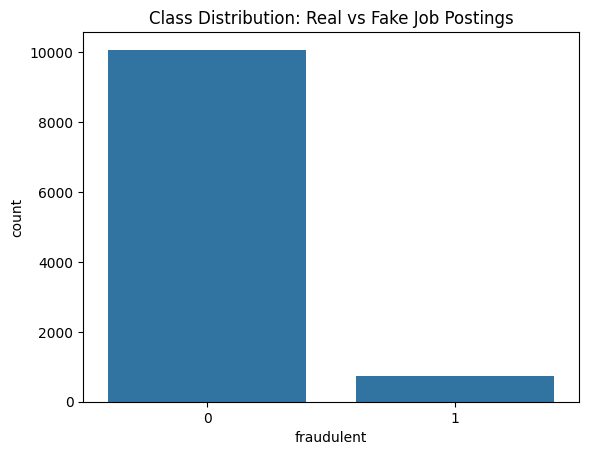

fraudulent
0    10067
1      730
Name: count, dtype: int64


In [4]:
sns.countplot(x='fraudulent', data=df_us)
plt.title("Class Distribution: Real vs Fake Job Postings")
plt.show()

print(df_us['fraudulent'].value_counts())